#**Tugas Pemrograman 1 Pengantar AI**

**Kelompok : 6**

**Kelas : IF-43-09**

**Nama Anggota Kelompok :**
1. Claudia Mei Serin Sitio / 1301190424
2. Priyan Fadhil Supriyadi / 1301190442
3. Vena Erla Candrika / 1301194040

**Skema Genetic Algorithm**

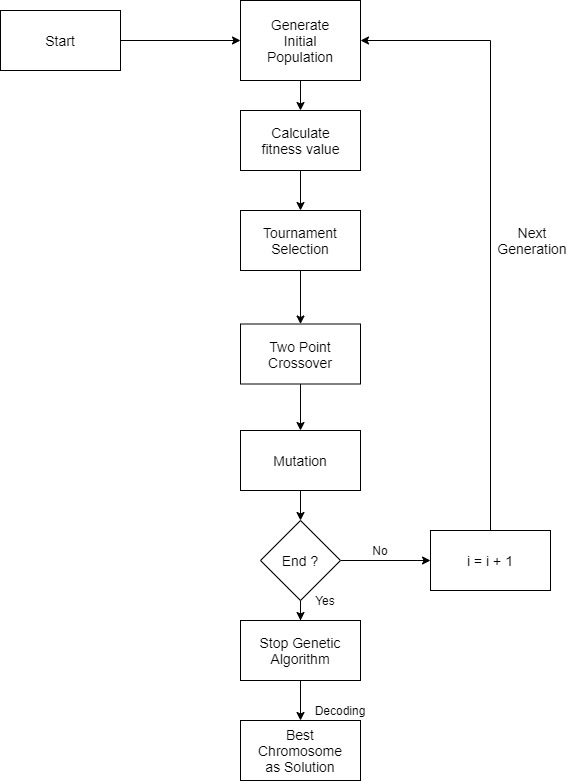

In [ ]:
import random
import math

In [ ]:
limitX1 = -1
limitX2 = 2
limitY1 = -1
limitY2 = 1

length = 8
min = 0
max = 1

populationSize = 50

nGen = 100

tournamentSize = 6
crossoverProbability = 0.6
mutationProbability = 0.1

In [ ]:
def individual(length,min,max):
  individu = [random.randint(min,max) for x in range(length)]
  return individu

In [ ]:
print(individual(length,min,max))

[0, 0, 1, 1, 1, 1, 0, 1]


In [ ]:
def population(populationSize):
    population = []
    for i in range(populationSize):
        population.append(individual(length,min,max))
    return population

In [ ]:
print(population(populationSize))

[[0, 0, 1, 1, 0, 0, 1, 1], [1, 0, 0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 1, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 1], [1, 0, 1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 0], [1, 1, 0, 1, 1, 1, 1, 0], [0, 0, 1, 0, 0, 0, 1, 1], [0, 1, 0, 1, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, 0, 1], [0, 0, 1, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 1, 0, 0], [1, 1, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, 1, 1], [1, 1, 1, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0], [1, 1, 1, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1, 1], [1, 0, 1, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 1, 1], [1, 0, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0

In [ ]:
def decode(individu):

    indLength = int(len(individu))
    indLengthHalf = int(len(individu) / 2)
    tempIndividu = individu.copy()
    sumGen = 0

    for i in range(indLengthHalf):
        tempIndividu[i] = tempIndividu[i] * (2 ** -(i + 1))
        tempIndividu[i + indLengthHalf] = individu[i + indLengthHalf] * (2 ** -(i + 1))
        sumGen = sumGen + (2 ** -(i + 1))

    x = limitX1 + ((limitX2 - limitX1) / sumGen) * sum(tempIndividu[0:indLengthHalf])
    y = limitY1 + ((limitY2 - limitY1) / sumGen) * sum(tempIndividu[indLengthHalf:indLength])
    del tempIndividu
    return x, y

In [ ]:
def fitness(individu):
    x, y = decode(individu)
    return ((math.cos(x**2) * math.sin(y**2)) + (x + y))

In [ ]:
def tournament_selection(population, tournamentSize):
    winner = None
    randomNum = random.sample(range(0, len(population) - 1), tournamentSize)
    for i in randomNum:
        individu = (population[i])
        if winner is None or fitness(individu) > fitness(winner):
            winner = individu
    return winner

In [ ]:
def one_point_crossover(individu1, individu2, crossoverProbability):
    randomProbability = random.random()
    if (randomProbability <= crossoverProbability):
        randomPoint = random.randint(0, length - 1)
        child1 = (individu1[0:randomPoint] + individu2[randomPoint:length])
        child2 = (individu2[0:randomPoint] + individu1[randomPoint:length])
        return child1, child2
    return individu1, individu2

In [ ]:
def two_point_crossover(individu1, individu2, crossoverProbability):
    randomProbability = random.random()
    if (randomProbability <= crossoverProbability):
        randomPoint = random.sample(range(0, length - 1), 2)
        randomPoint.sort()
        child1 = (individu1[0:randomPoint[0]] + individu2[randomPoint[0]:randomPoint[1]] + individu1[randomPoint[1]:length])
        child2 = (individu2[0:randomPoint[0]] + individu1[randomPoint[0]:randomPoint[1]] + individu2[randomPoint[1]:length])
        return child1, child2
    return individu1, individu2

In [ ]:
def mutation(chromosome, mutationProbability):
    randomProbability = random.random()
    if (randomProbability <= mutationProbability):
        randomIndex = random.randint(0, length - 1)
        if chromosome[randomIndex] == 1:
          chromosome[randomIndex] = 0
        else :
          chromosome[randomIndex] = 1

In [ ]:
def elitism_first_best(population):
    best = None
    for i in range(len(population)):
        if (best == None or fitness(population[i]) > fitness(best)):
            best = population[i]
    return best

In [ ]:
def elitism_second_best(population):
    best = elitism_first_best(population)
    best2nd = None
    for i in range(len(population)):
        if (best2nd == None or (fitness(population[i]) > fitness(best2nd) and fitness(population[i]) < fitness(best) and population[i] != best)):
            best2nd = population[i]
    return best2nd

In [ ]:
def changeGeneration(currentPopulation):
    newPopulation = []

    while len(newPopulation) != len(currentPopulation) - 2:
        parent1 = tournament_selection(currentPopulation, tournamentSize)
        parent2 = tournament_selection(currentPopulation, tournamentSize)
        while parent1 == parent2:
            parent2 = tournament_selection(currentPopulation, tournamentSize)
        child1, child2 = two_point_crossover(parent1, parent2, crossoverProbability)

        mutation(child1, mutationProbability)
        mutation(child2, mutationProbability)

        newPopulation.append(child1)
        newPopulation.append(child2)

    newPopulation.append(elitism_first_best(currentPopulation))
    newPopulation.append(elitism_second_best(currentPopulation))

    return newPopulation

In [ ]:
bestIndividu = []
x = population(populationSize)
print("First Gen", "--- dengan Cromosome :", "".join(str(j) for j in elitism_first_best(x)),
      "--- Nilai Fitness Tertinggi :", fitness(elitism_first_best(x)),
      "--- (x, y) :", decode(elitism_first_best(x)))
bestIndividu.append(elitism_first_best(x))
i = 0

while i < nGen:
    i = i + 1
    x = changeGeneration(x)
    bestIndividu.append(elitism_first_best(x))
    print('gen ke-', i, "--- dengan Cromosome :", "".join(str(j) for j in elitism_first_best(x)),"--- Nilai Fitness Tertinggi :", fitness(elitism_first_best(x)),"--- (x, y) :", decode(elitism_first_best(x)))

print("================================ Gen Terbaik =====================================")
BestGen = elitism_first_best(bestIndividu)
print("Cromosome     : ", "".join(str(i) for i in BestGen))
print("Fitness       : ", fitness(BestGen))
print("(X, Y)        : ", decode(BestGen))

First Gen --- dengan Cromosome : 11111101 --- Nilai Fitness Tertinggi : 2.3985183082405594 --- (x, y) : (2.0, 0.7333333333333334)
gen ke- 1 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 2.454648713412841 --- (x, y) : (1.0, 1.0)
gen ke- 2 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 2.454648713412841 --- (x, y) : (1.0, 1.0)
gen ke- 3 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 2.454648713412841 --- (x, y) : (1.0, 1.0)
gen ke- 4 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 2.454648713412841 --- (x, y) : (1.0, 1.0)
gen ke- 5 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 2.454648713412841 --- (x, y) : (1.0, 1.0)
gen ke- 6 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 2.454648713412841 --- (x, y) : (1.0, 1.0)
gen ke- 7 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 2.454648713412841 --- (x, y) : (1.0, 1.0)
gen ke- 8 --- dengan Cromosome : 10101111 --- Nilai Fitness Tertinggi : 